## Support Vector Regression (SVR)
By default, the SVR class doesn't include feature scaling. 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
# Handy tip: X must be a DF/Matrix, not a Series/Vector
# Therefore use .iloc[:, 1:2] instead of [:, 1]
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
# Splitting the dataset ino the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [4]:
# Feature Scaling - SVR doesn't apply/include feature scaling
# Since we're not creating any training/test sets, need to replace
# X_train, X_test, y_train, etc. with X and y
# Going to scale X and y by applying the fit_transform objects (sc_X, sc_y) 

# Note: need to create two StandardScaler objects for both X and y
# Going to fit these objects to two different matrices. 
# Will also do some transforming as well. This transform tool will
# scale X and y.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X) 
'''X_test = sc_X.transform(X_test)'''
y = sc_y.fit_transform(y.reshape(len(y), 1)) # fit_transform expects a matrix, not vector

/Users/gaylonalfano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [7]:
# Fitting the SVR model to the dataset
from sklearn.svm import SVR
# Params for SVR: Kernel - want a linear SVR, polynomial SVR, 
# Default kernel is 'rbf' for non-linear. Gautian kernel?
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Users/gaylonalfano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## IMPORTANT for correctly using regressor.predict AFTER applying feature scaling

Predicting the results. Got rid of the LR objects (lin_reg, poly_reg, etc.).

Without applying feature scaling, this y_pred comes out to ~130K
However, after applying feature scaling, we actually scaled X and y
and both X and y were transformed. But we never technically scaled 6.5. Therefore, have a couple more steps to do before we can get updated .predict w/ feature scaling:

1. Transform 6.5. Apply sc_X object to 6.5 so it can be suited to regressor. Don't use fit_transform since the sc_X object is already fitted to our matrix of features X. Just need .transform method.
2. Need to check arguments of .transform method. .transform requires an ARRAY. Need to transform 6.5 to array usingnp.array([[6.5]]). Note: [[]] = array; [] = vector. 
3. Use .inverse_transform to get original scale of salary. We don't want predictions of 0.3 salary. Need to inverse the scale transformation. Apply the inverse_transform method on the StandardScaler object of the dependent variable y (since we're predicting salary). y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))



In [8]:
# Predicting the results. Got rid of the LR objects (lin_reg, poly_reg, etc.)
# Without applying feature scaling, this y_pred comes out to ~130K
# However, after applying feature scaling, we actually scaled X and y
# and both X and y were transformed. But we never technically scaled 6.5. 
# Therefore, have a couple more steps to do before we can get updated 
# .predict w/ feature scaling

# Transform 6.5. Apply sc_X object to 6.5 so it can be suited to regressor
# Don't use fit_transform since the sc_X object is already fitted
# to our matrix of features X. Just need .transform method.
# **IMPORTANT** Need to check arguments of .transform method. 
# .transform requires an ARRAY. Need to transform 6.5 to array using
# np.array([[6.5]]). Note: np.array([[6.5]]) = array; np.array([6.5]) = vector. Now 6.5 is
# transformed to fit the regressor.


# Last, apply .inverse_transform to sc_y (see above notes)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]])))) # Level of hire was 6.5

In [9]:
np.array([[6.5]]).shape

(1, 1)

In [10]:
# This comes out to 130000 when w/o feature scaling.
# Now with feature scaling, y_pred is ~170k
y_pred

array([170370.0204065])

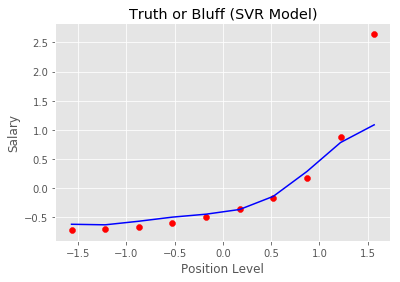

In [15]:
# Visualizing the SVR model results
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title("Truth or Bluff (SVR Model)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

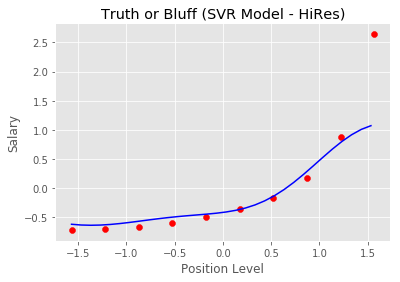

In [14]:
# Visualizing the SVR model results (higher resolution/smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Truth or Bluff (SVR Model - HiRes)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()